<a href="https://colab.research.google.com/github/cheddur93/DS-Sprint-01-Dealing-With-Data/blob/master/DS_Unit_1_Sprint_Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [78]:
# TODO
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data',header=None,names=['Age','Year','Nodes','Status'])
df['Status'].replace([1,2],[1,0],inplace=True)  
     # For Status: 1 = patient lives longer than five years; 0 = patient died within 5 years
print(df.count())
print(df.isna().sum())
df.head(306)

Age       306
Year      306
Nodes     306
Status    306
dtype: int64
Age       0
Year      0
Nodes     0
Status    0
dtype: int64


,Age,Year,Nodes,Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,0
8,34,66,9,0
9,34,58,30,1


## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

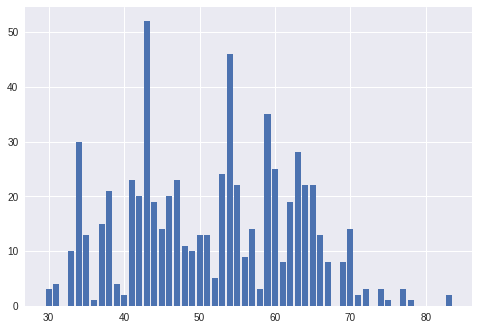

In [79]:
# TODO

plt.bar(df['Age'],df['Nodes']);


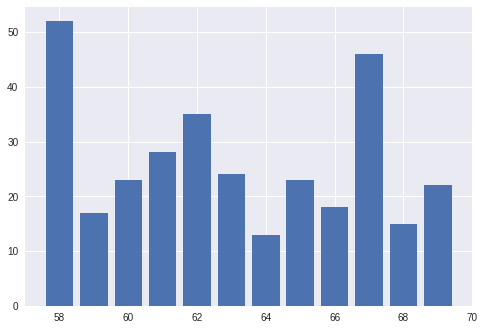

In [80]:
plt.bar(df['Year'],df['Nodes']);

In [85]:
pd.crosstab(df.Year,df.Status,normalize='index')


Status,0,1
Year,,
58,0.333333,0.666667
59,0.333333,0.666667
60,0.142857,0.857143
61,0.115385,0.884615
62,0.304348,0.695652
63,0.266667,0.733333
64,0.258065,0.741935
65,0.464286,0.535714
66,0.214286,0.785714


In [95]:
pd.crosstab(df.Age,df.Status,normalize='index')

Status,0,1
Age,,
30,0.000000,1.000000
31,0.000000,1.000000
33,0.000000,1.000000
34,0.285714,0.714286
35,0.000000,1.000000
36,0.000000,1.000000
37,0.000000,1.000000
38,0.100000,0.900000
39,0.166667,0.833333


In [67]:
pd.crosstab(df.Nodes,df.Status,margins=True)

Status,0,1,All
Nodes,,,
0,19,117,136
1,8,33,41
2,5,15,20
3,7,13,20
4,3,10,13
5,4,2,6
6,3,4,7
7,2,5,7
8,2,5,7


## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive correlation with survival?
  
  
  --- Young age; Less Nodes ---
  
  
- What is at least one feature that looks to have a negative correlation with survival?
  
  
 --- Old age; More Nodes ---
  
  
- How are those two features related with each other, and what might that mean?
  
  
  --- The first bar graph comparing age to node shows that these two factors are mutually exclusive. However, I believe that the age to status histogram and the node to status histogram indicated that the older the age the less likelihood of survival and the higher the node count the less likelihood of survival. I think it's safe to conclude that with a younger female with a lower node count survival is more likely than an older female with a higher node count. ---
  
      --- Note... never got the histograms to actually run b/c I spent so much time trying to bin! taking notes from Kailey Smith's sns heatmap and will hopefully be able to recreate this this weekend. Hopefully you can see where I was going with this given the crosstabulation data, though... ---
  
  
- Answer with text, but feel free to intersperse example code/results or refer to it from earlier.